# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings



I scraped mycareersfuture.sg on these keywords: 

Total job scraped: **1582**

After cleaning: **914**

How I cleaned: 
* Filter full-time employement type only
* Filter out those without salary information
* Drop duplicates
* Drop weird salary range

The cleaned data is stored in SQL database './careers.db'

This notebook contains:
1. [Diagnostics] #
2. [Data Cleaning] 
3. [EDA]

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib;
import matplotlib.pyplot as plt;

import seaborn as sns;

matplotlib.rcParams['font.family'] = 'mono';
matplotlib.rcParams['font.weight'] = 3;
matplotlib.rcParams['font.size'] = 10;

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import sqlite3
sqlite_db = './careers.db'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

### Step 1 - Diagnostics

In [4]:
sql = '''
SELECT *
FROM mycareersfuture
'''

In [5]:
sql2 = '''
SELECT *
FROM mycareersfuture_new
'''

In [6]:
jobs_df = pd.concat([pd.read_sql(sql, con=conn), pd.read_sql(sql2, con=conn)]).drop_duplicates()
jobs_df = jobs_df.drop(['index'],axis=1)

In [7]:
len(jobs_df)

1582

In [8]:
jobs_df.dtypes

job_title          object
company_name       object
salary             object
industry           object
employment_type    object
seniority          object
job_description    object
requirements       object
dtype: object

In [9]:
jobs_df.job_title.value_counts()

#Irrelevant Job Title
#Human Resource Executive, Android Developer, IOS Developer, Principal Engineer (IOS), Executive(Admissions), intern(IOS), Payroll Executive

Business Analyst                                                    65
Data Scientist                                                      53
Senior Business Analyst                                             23
Data Engineer                                                       23
Data Analyst                                                        21
Scientist (Data Analytics)  /  I2R (A*STAR)                         14
Research Engineer (Data Analytics)  /  I2R (A*STAR)                 12
Manager                                                             11
Business Intelligence Lead                                           8
Senior Manager                                                       7
IT Business Analyst                                                  7
Business Intelligence Analyst                                        6
Information Technology Business Analyst                              6
Senior Data Scientist                                                6
Senior

In [10]:
jobs_df.seniority.value_counts()

Professional                                                        442
Executive                                                           280
Manager                                                             218
Senior Executive                                                    180
Middle Management                                                    86
Non-executive                                                        63
Senior Management                                                    51
Junior Executive                                                     51
Fresh/entry level                                                    28
Middle Management, Manager                                           24
Manager, Professional                                                17
Executive, Senior Executive                                          17
Manager, Senior Executive                                            16
Executive, Junior Executive                                     

In [11]:
jobs_df.employment_type.value_counts()

Full Time                                                            609
Permanent, Full Time                                                 306
Permanent                                                            287
Contract, Full Time                                                  185
Contract                                                             135
Permanent, Contract, Full Time                                        25
Permanent, Contract                                                   17
Internship                                                             6
Contract, Full Time, Internship                                        2
Temporary, Contract                                                    2
Temporary                                                              1
Part Time, Permanent, Temporary, Freelance, Full Time, Internship      1
Part Time                                                              1
Part Time, Temporary, Contract, Full Time, Flexi wo

In [12]:
jobs_df.industry.value_counts()

Information Technology                                                                                                 649
Banking and Finance                                                                                                    185
Sciences / Laboratory / R&D                                                                                             91
Others                                                                                                                  56
Marketing / Public Relations                                                                                            52
Consulting                                                                                                              44
Advertising / Media                                                                                                     38
Engineering                                                                                                             35
Accounting / Aud

In [13]:
jobs_df.salary.value_counts()

Salary undisclosed           113
$5,000to$8,000Monthly         72
$6,000to$12,000Monthly        54
$4,500to$9,000Monthly         50
$5,000to$10,000Monthly        41
$7,000to$14,000Monthly        40
$5,000to$7,000Monthly         38
$4,000to$6,000Monthly         37
$6,000to$9,000Monthly         36
$4,000to$8,000Monthly         31
$2,500to$5,000Monthly         28
$8,000to$15,000Monthly        28
$6,000to$8,000Monthly         27
$5,000to$9,000Monthly         26
$3,000to$6,000Monthly         23
$10,000to$14,000Monthly       21
$8,000to$12,000Monthly        20
$5,000to$6,000Monthly         17
$10,000to$15,000Monthly       16
$6,000to$7,000Monthly         16
$5,500to$11,000Monthly        15
$4,000to$7,000Monthly         15
$5,000to$7,500Monthly         13
$5,500to$7,500Monthly         13
$3,500to$4,500Monthly         13
$3,400to$6,800Monthly         12
$3,000to$4,000Monthly         12
$3,000to$5,000Monthly         12
$3,000to$4,500Monthly         11
$5,500to$8,000Monthly         11
          

### Step 2 - Housekeeping

1. Look at full-time employment only
2. Drop those without salary information
3. Apply second and third layer filters
    - The search result from My Careers Future has gone through the first layer of filtering -- meaning that either the job title or description will contain our search terms -- in this section, I'll add second and third filters: full-time employment type only and look into job descriptions to ensure that their functions are related to data. 

In [14]:
#filter Jobs Data - only looking at full time employment type
jobs_df = jobs_df[jobs_df.employment_type.str.contains('Full Time')]
len(jobs_df)

1133

In [15]:
jobs_df = jobs_df[jobs_df.salary != 'Salary undisclosed']
len(jobs_df)

1054

In [16]:
#Look at irrelevant Job Title, see if these should be dropped.  
#Human Resource Executive, Developer, Executive(Admissions), Payroll Executive

#Containing Human Resource
jobs_HR = jobs_df[jobs_df.job_title.str.contains('Human Resource')]

In [17]:
jobs_HR

,job_title,company_name,salary,industry,employment_type,seniority,job_description,requirements
45,"Assistant Vice President, SAP Functional Busin...",Company Undisclosed,"$6,000to$8,000Monthly",Banking and Finance,Full Time,Middle Management,Roles & ResponsibilitiesYou will be a member o...,Requirements Bachelor's degree in Computer Sci...
28,Human Resource Executive,SIN HIAP MUI PTE. LTD.,"$2,000to$3,000Monthly",Human Resources,Full Time,Executive,Roles & ResponsibilitiesThe Human Resource Exe...,Requirements ~ Analyse employee demographics a...
30,Human Resource Officer / Executive,RPAT PTE. LTD.,"$1,800to$2,800Monthly","Human Resources , Information Technology","Part Time, Temporary, Contract, Full Time, Fle...","Manager, Fresh/entry level, Executive",Roles & ResponsibilitiesThe Human Resource Exe...,Requirements~ Analyse employee demographics an...
140,Human Resources Service Delivery Associate,"JPMORGAN CHASE BANK, N.A.","$5,000to$10,000Monthly","Banking and Finance, Human Resources","Permanent, Full Time",Executive,Roles & ResponsibilitiesGlobal Human Resources...,RequirementsTeam Overview Global Human Resourc...
424,Human Resource Executive,THE SUPREME HR ADVISORY PTE. LTD.,"$2,400to$3,000Monthly",Human Resources,Full Time,Junior Executive,Roles & ResponsibilitiesThe Human Resource Exe...,Requirements ~ Analyse employee demographics a...
780,Human Resource Executive,PURPLECLICK MEDIA PTE. LTD.,"$2,000to$3,000Monthly","Advertising / Media , Human Resources","Part Time, Permanent, Contract, Full Time","Junior Executive, Senior Executive",Roles & ResponsibilitiesThe Human Resource Exe...,"Requirements Implement effective sourcing, scr..."
783,Human Resource Executive,UMAMI FOODS PTE. LTD.,"$2,200to$2,600Monthly","Admin / Secretarial, F&B",Full Time,Executive,Roles & ResponsibilitiesThe Human Resource Exe...,Requirements ~ Analyse employee demographics a...


In [18]:
jobs_HR[['job_title', 'job_description']].values

array([['Assistant Vice President, SAP Functional Business Analyst, Human Resources Information Systems HRIS',
        'Roles & ResponsibilitiesYou will be a member of the HRIS team responsible to support the implementation of SAP Human Resources Management System (HRMS), Success Factor HR modules, quarterly change requests and HR Datamart. Working with internal users and cross-functional teams, you will develop and translate business needs into functional requirements.\xa0 On a daily basis, you will be expected to be able to trouble-shoot on the SAP and SF issues reported globally. As a functional business analyst of the project team, you will also be responsible for gathering requirements, design/review solutions, stakeholders communication, training, building test plans and executing test cycles. You will partner with internal IT and/or the outsourced systems integrator throughout all project phases, and continue to support and maintain the HRMS after implementation.'],
       ['Hum

In [19]:
#Looks like HR is related to data analytics, so we'll keep it. 
#Containing Android or IOS
jobs_developer = jobs_df[jobs_df.job_title.str.contains('Developer')][['job_title', 'company_name', 'job_description']].reset_index()
len(jobs_developer)

52

In [115]:
#Without analysing the job description, the function of a developer is different from 
jobs_developer.job_title

0                                      C#.net Developer
1             Senior Dotnet Developer (web application)
2                                 Senior Java Developer
3               O&T - Java and JEE Developer - 18046382
4                                      UiPath Developer
5                                     Android Developer
6                           UiPath Developer-Consultant
7            Informatica and Cognos Reporting Developer
8                                   Front End Developer
9                                  Sharepoint Developer
10                         Informatica Senior Developer
11                                    Android Developer
12                                     Senior Developer
13                                    Android Developer
14                     Senior Developer - Microstrategy
15    Engineering, Operations Engineering, Client On...
16                                        iOS Developer
17                                        iOS De

In [116]:
#Take random sample from developer to analyse JD
jobs_developer.loc[0,:].values

array([20, 'C#.net Developer', 'ON DEMAND AGILITY SOLUTIONS PTE. LTD.',
       'Roles & Responsibilities Responsibilities o\xa0\xa0 \xa0Deliver fully tested source code complying with quality indicators objectives o\xa0\xa0 \xa0Address technical aspects with architect and functional aspects with business analyst. o\xa0\xa0 \xa0Liaise with business analysts for clarification and understanding of requirements. o\xa0\xa0 \xa0Analyze technical constraints considering functional impacts with technical lead’s help o\xa0\xa0 \xa0Organize and keep up to date detailed technical documentation o\xa0\xa0 \xa0Provide detailed estimation for development of solutions o\xa0\xa0 \xa0Develop tests strategy in coordination with project manager / Business Analysts o\xa0\xa0 \xa0Implement solutions using TDD o\xa0\xa0 \xa0Follow the user acceptance test and coordinate the prioritization with project manager o\xa0\xa0 \xa0Support applications in production - analyze and resolve issues as they arise o\xa0\xa

In [117]:
jobs_developer.loc[1,:].values

array([59, 'Senior Dotnet Developer (web application)',
       'CAPITA PTE. LTD.',
       'Roles & ResponsibilitiesJob Requirement: Requirement gathering • Attend relevant workshops, market sessions and interactions. • Liaise with necessary topic experts to ensure that facts are collated • Conduct research to supplement regarding technical aspects of requirements • Together with the Business Analyst and Technical Specialist ensure that the requirements are understood, aligned and documented Solution design • Collaborate with relevant stakeholders to ensure that a robust and elegant solution is designed • Ensure that all solutions fits within the regional systems landscape • Ensure that al solutions fit within the RCoC infrastructure landscape • Consider and include integration requirements re. existing systems solutions • Document and share the design with required stakeholders Solution build • Build solutions as per requirement • Liaise with ITI to ensure that all infrastructure requi

In [118]:
jobs_developer.loc[24,:].values

array([3,
       'VP / AVP,  Sr. Frontend Developer,  Group Consumer Banking and Big Data Analytics Technology (180004F7',
       'DBS BANK LTD.',
       'Roles & ResponsibilitiesKey Accountabilities  DBS Consumer Banking and Group Technology is looking for passionate Frontend Engineers to work on our in-house Web Framework for crafting and assembling our next generation consumer experiences. If you are the kind of engineer who is passionate about bringing great experiences to life and love working in a collaborative environment with your product and experiences, then we want to talk to you.   Responsibilities  Develop applications following best practices of accessibility and test-driven development. Create reusable, testable, organized, efficient, and self-documenting code/components. Partner closely with design and product teams to craft product experiences while providing technical guidance and solutions\xa0 Deliver code in a DevOps environment. Encourage code craftsmanship across 

In [93]:
#Seems like developers work very closely with data analysts/ data scientists to understand users' requirements 
#thus I will leave developers here are their job is related to data

In [119]:
jobs_payroll = jobs_df[jobs_df.job_title.str.contains('Payroll')][['job_title', 'company_name', 'job_description']].reset_index()
jobs_payroll.values
#This is also data related

array([[743, 'Payroll Executive', 'PICO GUARDS PTE LTD',
        'Roles & Responsibilities Responsible for full spectrum of payroll activities including payroll reconciliation, reports and analytics. Ensuring payroll timelines and accuracy are met for all salary paid out. Ensure that all payroll processing and practices are in compliance with local statutory legislation and company policies. Maintain and ensure that all employee and salary data are accurately update into in-house payroll software. Verify and process ad-hoc payment (i.e. incentive, split shift, medical incentive and etc). Responsible for statutory payment submission like CPF, IR8A, IR21, MOM and related market surveys, childcare leaves, maternity leaves, paternity leaves and NS Claims. Assisting compensation and benefits functions such as salary benchmarking, participation in salary and statutory surveys, benefit review and renewal. Administer for in-house time attendance records and ensure all employees records & atten

### Step 3 - Cleaning & EDA

1. Extract monthly min-max salary 
   - My target variable will be the min salary. 
   - Stretch goal: predict Max salary by mining 'years of experience' from the JD
2. Mini EDA


#### Extract Monthly Salary

In [51]:
jobs_df.salary

1      $12,000to$160,000Monthly
2         $5,000to$7,000Monthly
5         $5,000to$8,000Monthly
7         $4,000to$9,000Monthly
9         $3,400to$6,000Monthly
10        $2,800to$3,500Monthly
11        $4,583to$7,291Monthly
12        $4,000to$6,500Monthly
13        $4,500to$9,000Monthly
14        $4,000to$5,500Monthly
15       $6,000to$12,000Monthly
16        $4,000to$7,000Monthly
17       $5,000to$10,000Monthly
18        $2,500to$3,500Monthly
19        $3,000to$6,000Monthly
20        $5,800to$6,800Monthly
21        $5,500to$6,000Monthly
22       $6,000to$12,000Monthly
23        $5,000to$7,500Monthly
24        $4,800to$8,000Monthly
25       $2,000to$10,000Monthly
28        $3,500to$5,500Monthly
30        $6,000to$8,000Monthly
32        $6,000to$8,000Monthly
35        $3,800to$5,300Monthly
37        $4,000to$6,000Monthly
38      $12,000to$15,000Monthly
43        $4,500to$9,000Monthly
45        $6,000to$8,000Monthly
46        $3,500to$5,500Monthly
                 ...           
901     

A - convert annual salary to monthly salary, and extract the min max value from the salary column

In [28]:
jobs_annual_salary = jobs_df[jobs_df.salary.str.contains('Annual')].reset_index()
jobs_annual_salary = jobs_annual_salary.drop('index', axis=1)

In [29]:
#find MIN salary and join with annual salary dataframe
#jobs_annual_salary = jobs_annual_salary.join(jobs_annual_salary.salary.str.partition('to')).drop([1, 2], axis=1)
salary_min_max = jobs_annual_salary.salary.str.partition('to').drop(1, axis=1)
salary_min_max.columns = ['salary_min', 'salary_max']
salary_min_max.salary_max = salary_min_max.salary_max.str.partition('Annually')

In [30]:
#Change to monthly
salary_min_max.salary_min = salary_min_max.salary_min.str.replace(',', '')
salary_min_max.salary_min = salary_min_max.salary_min.str.replace('$', '').astype(float)
salary_min_max.salary_max = salary_min_max.salary_max.str.replace(',', '')
salary_min_max.salary_max = salary_min_max.salary_max.str.replace('$', '').astype(float)

In [31]:
salary_min_max.salary_min = [c/12 for c in salary_min_max.salary_min]
salary_min_max.salary_max = [c/12 for c in salary_min_max.salary_max]
jobs_annual_salary = jobs_annual_salary.join(np.round(salary_min_max), how='left').drop('salary', axis=1)

In [32]:
jobs_annual_salary

,job_title,company_name,industry,employment_type,seniority,job_description,requirements,salary_min,salary_max
0,Group Shareholding Program IT Business Analyst,UBS AG,Banking and Finance,Full Time,Executive,Roles & ResponsibilitiesDo you have a knack fo...,RequirementsYou have: – experience as IT busin...,6250.0,11667.0
1,Financial Crime Prevention Data Analyst,UBS AG,Banking and Finance,Full Time,Professional,Roles & ResponsibilitiesYour role : Do you hav...,RequirementsYour expertise : You have: - worke...,5000.0,10833.0
2,business analyst - APJC Strategy and Planning,CISCO SYSTEMS (USA) PTE. LTD.,Information Technology,Full Time,Professional,Roles & ResponsibilitiesBusiness Analyst – Str...,RequirementsWho You Are This is an exciting op...,6917.0,10375.0
3,business analyst - APJC Strategy and Planning,CISCO SYSTEMS (USA) PTE. LTD.,Information Technology,Full Time,Professional,Roles & ResponsibilitiesBusiness Analyst – Str...,RequirementsWho You Are This is an exciting op...,8333.0,12083.0
4,Principal Prod & Tech Consulting,SABRE ASIA PACIFIC PTE. LTD.,Consulting,Full Time,Manager,Roles & ResponsibilitiesSabre is the global le...,RequirementsMinimum 8 years related experience...,8525.0,12175.0
5,business analyst - APJC Strategy and Planning,CISCO SYSTEMS (USA) PTE. LTD.,Information Technology,Full Time,Professional,Roles & ResponsibilitiesBusiness Analyst – Str...,RequirementsWho You Are This is an exciting op...,6917.0,10375.0
6,Data Analyst - Automation Enablement,UBS AG,Banking and Finance,Full Time,Senior Executive,Roles & ResponsibilitiesDo you have a knack of...,RequirementsYou have: - Strong analytical skil...,7083.0,12083.0
7,Senior Developer - Microstrategy,Company Undisclosed,Information Technology,Full Time,Professional,Roles & ResponsibilitiesMicroStrategy – Sr. De...,Requirements Preferred Background and Experien...,6750.0,7500.0
8,Business Analyst,NCR SINGAPORE PTE LTD,Information Technology,Full Time,Professional,Roles & ResponsibilitiesJOB TITLE: Business An...,RequirementsQualification Bachelor’s Degree...,6667.0,7917.0
9,Data Analyst,SMARTKARMA INNOVATIONS PTE. LTD.,Information Technology,"Full Time, Internship",Junior Executive,Roles & ResponsibilitiesImportant: Please comp...,Requirements Demonstrable ability and passion ...,2000.0,3750.0


B - Extract min max salary from the monthly salary column

In [33]:
jobs_monthly_salary = jobs_df[jobs_df.salary.str.contains('Monthly')].reset_index()
jobs_monthly_salary = jobs_monthly_salary.drop(['index'], axis=1)

In [34]:
monthly_salary_min_max = jobs_monthly_salary.salary.str.partition('to').drop(1, axis=1)
monthly_salary_min_max.columns = ['salary_min', 'salary_max']
monthly_salary_min_max.salary_max = monthly_salary_min_max.salary_max.str.partition('Monthly')

In [35]:
monthly_salary_min_max.salary_min = monthly_salary_min_max.salary_min.str.replace(',', '')
monthly_salary_min_max.salary_min = monthly_salary_min_max.salary_min.str.replace('$', '').astype(float)
monthly_salary_min_max.salary_max = monthly_salary_min_max.salary_max.str.replace(',', '')
monthly_salary_min_max.salary_max = monthly_salary_min_max.salary_max.str.replace('$', '').astype(float)

In [36]:
jobs_monthly_salary

,job_title,company_name,salary,industry,employment_type,seniority,job_description,requirements
0,Data Scientist,EXIGER SINGAPORE PTE. LTD.,"$12,000to$160,000Monthly","Information Technology, Professional Services","Permanent, Full Time",Professional,Roles & ResponsibilitiesPosition Summary We ar...,RequirementsProfessional Experience Required ...
1,Data Engineer,Company Undisclosed,"$5,000to$7,000Monthly",Information Technology,"Contract, Full Time",Executive,"Roles & Responsibilities Design, build, launch...",Requirements Experience and passion for data e...
2,Business Analyst - Analytics,SCIENTE INTERNATIONAL PTE. LTD.,"$5,000to$8,000Monthly",Banking and Finance,"Contract, Full Time",Professional,Roles & ResponsibilitiesWe are looking for a p...,RequirementsMandatory Skill-set Degree in Ban...
3,Data Scientist,CHEIL SINGAPORE PTE. LTD.,"$4,000to$9,000Monthly",Engineering,"Permanent, Full Time",Senior Executive,Roles & Responsibilities Integrate all owned m...,Requirements 4 to 6 years hands-on experience ...
4,Facilities Data Scientist,Company Undisclosed,"$3,400to$6,000Monthly","Engineering, Manufacturing","Permanent, Full Time",Junior Executive,Roles & ResponsibilitiesResponsibilities: 1)...,"RequirementsRequirements: •Bachelor, Master o..."
5,Business Analyst (Trading),WATSON'S PERSONAL CARE STORES PTE LTD,"$2,800to$3,500Monthly",Others,"Permanent, Full Time",Executive,Roles & ResponsibilitiesTo assist with promoti...,Requirements Degree in Business Administration...
6,O&T - Business Analyst - Digital,CITIBANK N.A.,"$4,583to$7,291Monthly",Banking and Finance,Full Time,Middle Management,Roles & ResponsibilitiesAbout Global Consumer ...,RequirementsEducation: Have a Bachelor/Master...
7,Business Analyst,LIBERTY WIRELESS PTE. LTD.,"$4,000to$6,500Monthly",Information Technology,Full Time,Executive,Roles & ResponsibilitiesCircles.Life is Asia’s...,"RequirementsMust Have - BS in Mathematics, E..."
8,Scientist (Data Analytics) / I2R (A*STAR),A*STAR RESEARCH ENTITIES,"$4,500to$9,000Monthly",Sciences / Laboratory / R&D,"Contract, Full Time",Professional,Roles & ResponsibilitiesAbout the Institute fo...,Requirements Ph. D in the field of computer sc...
9,"Manager, Product Development (JD#4478)",SCIENTE INTERNATIONAL PTE. LTD.,"$4,000to$5,500Monthly",Insurance,"Permanent, Full Time","Manager, Senior Executive",Roles & ResponsibilitiesJob Summary We are loo...,RequirementsDesired Skill-set Experience in F...


In [37]:
jobs_monthly_salary = jobs_monthly_salary.join(monthly_salary_min_max, how='left').drop('salary', axis=1)

In [38]:
jobs_monthly_salary.head()

,job_title,company_name,industry,employment_type,seniority,job_description,requirements,salary_min,salary_max
0,Data Scientist,EXIGER SINGAPORE PTE. LTD.,"Information Technology, Professional Services","Permanent, Full Time",Professional,Roles & ResponsibilitiesPosition Summary We ar...,RequirementsProfessional Experience Required ...,12000.0,160000.0
1,Data Engineer,Company Undisclosed,Information Technology,"Contract, Full Time",Executive,"Roles & Responsibilities Design, build, launch...",Requirements Experience and passion for data e...,5000.0,7000.0
2,Business Analyst - Analytics,SCIENTE INTERNATIONAL PTE. LTD.,Banking and Finance,"Contract, Full Time",Professional,Roles & ResponsibilitiesWe are looking for a p...,RequirementsMandatory Skill-set Degree in Ban...,5000.0,8000.0
3,Data Scientist,CHEIL SINGAPORE PTE. LTD.,Engineering,"Permanent, Full Time",Senior Executive,Roles & Responsibilities Integrate all owned m...,Requirements 4 to 6 years hands-on experience ...,4000.0,9000.0
4,Facilities Data Scientist,Company Undisclosed,"Engineering, Manufacturing","Permanent, Full Time",Junior Executive,Roles & ResponsibilitiesResponsibilities: 1)...,"RequirementsRequirements: •Bachelor, Master o...",3400.0,6000.0


c - join the two dataframe together

In [39]:
df_clean = pd.concat([jobs_monthly_salary, jobs_annual_salary], sort=True).reset_index()
df_clean = df_clean.drop('index', axis=1)
df_clean = df_clean.drop_duplicates()

In [40]:
df_clean

,company_name,employment_type,industry,job_description,job_title,requirements,salary_max,salary_min,seniority
0,EXIGER SINGAPORE PTE. LTD.,"Permanent, Full Time","Information Technology, Professional Services",Roles & ResponsibilitiesPosition Summary We ar...,Data Scientist,RequirementsProfessional Experience Required ...,160000.0,12000.0,Professional
1,Company Undisclosed,"Contract, Full Time",Information Technology,"Roles & Responsibilities Design, build, launch...",Data Engineer,Requirements Experience and passion for data e...,7000.0,5000.0,Executive
2,SCIENTE INTERNATIONAL PTE. LTD.,"Contract, Full Time",Banking and Finance,Roles & ResponsibilitiesWe are looking for a p...,Business Analyst - Analytics,RequirementsMandatory Skill-set Degree in Ban...,8000.0,5000.0,Professional
3,CHEIL SINGAPORE PTE. LTD.,"Permanent, Full Time",Engineering,Roles & Responsibilities Integrate all owned m...,Data Scientist,Requirements 4 to 6 years hands-on experience ...,9000.0,4000.0,Senior Executive
4,Company Undisclosed,"Permanent, Full Time","Engineering, Manufacturing",Roles & ResponsibilitiesResponsibilities: 1)...,Facilities Data Scientist,"RequirementsRequirements: •Bachelor, Master o...",6000.0,3400.0,Junior Executive
5,WATSON'S PERSONAL CARE STORES PTE LTD,"Permanent, Full Time",Others,Roles & ResponsibilitiesTo assist with promoti...,Business Analyst (Trading),Requirements Degree in Business Administration...,3500.0,2800.0,Executive
6,CITIBANK N.A.,Full Time,Banking and Finance,Roles & ResponsibilitiesAbout Global Consumer ...,O&T - Business Analyst - Digital,RequirementsEducation: Have a Bachelor/Master...,7291.0,4583.0,Middle Management
7,LIBERTY WIRELESS PTE. LTD.,Full Time,Information Technology,Roles & ResponsibilitiesCircles.Life is Asia’s...,Business Analyst,"RequirementsMust Have - BS in Mathematics, E...",6500.0,4000.0,Executive
8,A*STAR RESEARCH ENTITIES,"Contract, Full Time",Sciences / Laboratory / R&D,Roles & ResponsibilitiesAbout the Institute fo...,Scientist (Data Analytics) / I2R (A*STAR),Requirements Ph. D in the field of computer sc...,9000.0,4500.0,Professional
9,SCIENTE INTERNATIONAL PTE. LTD.,"Permanent, Full Time",Insurance,Roles & ResponsibilitiesJob Summary We are loo...,"Manager, Product Development (JD#4478)",RequirementsDesired Skill-set Experience in F...,5500.0,4000.0,"Manager, Senior Executive"


In [41]:
#Check if there's any weird patterns in salary
df_clean.describe()

,salary_max,salary_min
count,917.000000,917.000000
mean,9687.237732,5864.933479
std,7682.115582,3347.797912
min,2100.000000,1800.000000
25%,6500.000000,4000.000000
50%,8300.000000,5000.000000
75%,12000.000000,7000.000000
max,160000.000000,70000.000000


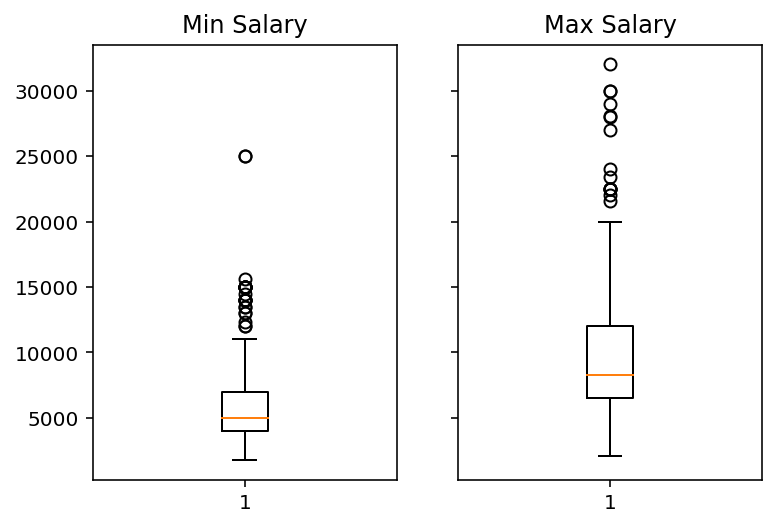

In [48]:
#Check if there's any weird patterns in salary
#Plot min salary to look at funny patterns
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
_ = ax1.boxplot(df_clean.salary_min)
_ = ax1.set_title('Min Salary')
_ = ax2.boxplot(df_clean.salary_max)
_ = ax2.set_title('Max Salary')

In [43]:
#Weird figures: min salary at 70,000? Max Salary at 160,000? let's investigate!
#seems like index 150 misclassified 'Monthly Salary' as 'Annual Salary'... we will drop this row because I'm not sure.
#For other rows, the minimum salary is commensurate with the position and job experience requirements

df_clean[df_clean.salary_min > 15000]

,company_name,employment_type,industry,job_description,job_title,requirements,salary_max,salary_min,seniority
150,KERRY CONSULTING PTE. LTD.,"Permanent, Full Time",Accounting / Auditing / Taxation,Roles & Responsibilities- Established Industry...,Business Intelligence Finance Senior Analyst ...,RequirementsThe successful candidate should ha...,120000.0,70000.0,Manager
872,KLARE SERVICES SINGAPORE PTE. LTD.,Full Time,Information Technology,Roles & Responsibilities Review Functional Spe...,Senior SAP BW / BOBJ Consultant,RequirementsMinimum 15+ years in SAP BW with a...,30000.0,25000.0,Executive
958,APPLE SOUTH ASIA PTE. LTD.,Full Time,Human Resources,Roles & ResponsibilitiesFocused on the Corpora...,"People Team Director, APAC",RequirementsKey Qualifications Able to demons...,32000.0,25000.0,Middle Management
1051,EQUINIX ASIA PACIFIC PTE. LTD.,Full Time,Building and Construction,Roles & ResponsibilitiesSummary This position...,"Director, Commercial Management & Construction",RequirementsQualifications & Experience Bache...,19167.0,15583.0,Senior Management


In [44]:
#for index 0 and 816, the jump from min to max salary is too high. I assume they accidentally entered one extra '0' 
#We'll drop these columns too. 

df_clean[df_clean.salary_max > 40000]

,company_name,employment_type,industry,job_description,job_title,requirements,salary_max,salary_min,seniority
0,EXIGER SINGAPORE PTE. LTD.,"Permanent, Full Time","Information Technology, Professional Services",Roles & ResponsibilitiesPosition Summary We ar...,Data Scientist,RequirementsProfessional Experience Required ...,160000.0,12000.0,Professional
150,KERRY CONSULTING PTE. LTD.,"Permanent, Full Time",Accounting / Auditing / Taxation,Roles & Responsibilities- Established Industry...,Business Intelligence Finance Senior Analyst ...,RequirementsThe successful candidate should ha...,120000.0,70000.0,Manager
816,SOCIAL ROOM CONCEPTS PTE. LTD.,"Permanent, Full Time",F&B,Roles & ResponsibilitiesThe Manager/Senior Man...,Manager,Requirements ~ Analyse data for business insig...,70000.0,4000.0,"Senior Management, Manager"


In [45]:
#Drop them!
df_clean = df_clean.drop([0, 150, 816], axis=0)

In [46]:
#Add salary average
df_clean['salary_avg'] = (df_clean.salary_max + df_clean.salary_min)/2

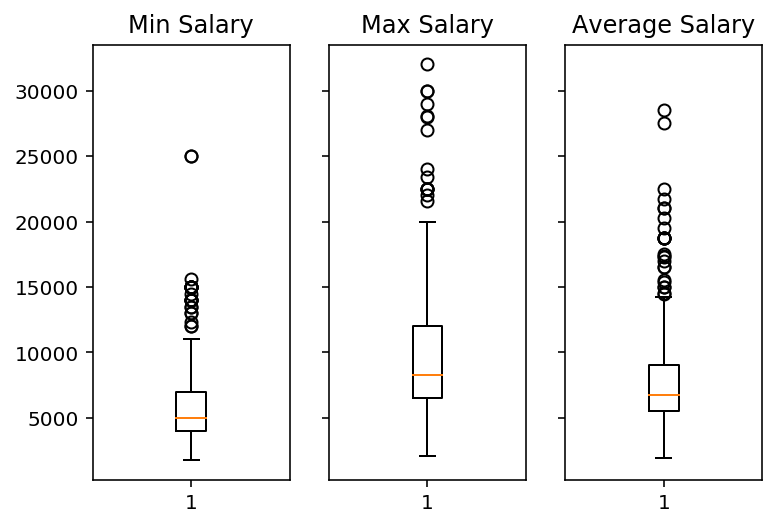

In [47]:
#Looks so much better!
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True)
_ = ax1.boxplot(df_clean.salary_min)
_ = ax1.set_title('Min Salary')
_ = ax2.boxplot(df_clean.salary_max)
_ = ax2.set_title('Max Salary')
_ = ax3.boxplot(df_clean.salary_avg)
_ = ax3.set_title('Average Salary')

### EDA

1. How many jobs available?
2. Job Title
3. Industry
4. Seniority
5. Salary

**1. How many jobs available**

In [49]:
print('There are ', len(df_clean), 'jobs available from mycareersfuture.sg')

There are  914 jobs available from mycareersfuture.sg


**2. What kind of jobs available**

In [81]:
#Count the distribution of job title

df_clean['job_title_clean'] = ['Data Scientist' if 'scien' in job_title.lower() else 
                               'Data Analyst' if 'data' in job_title.lower() and 'analy' in job_title.lower() else 
                                'Business Analyst' if 'business' in job_title.lower() else 
                                 'Data Analyst'if 'analy' in job_title.lower() else 
                                 'Data Engineer'if 'engineer' in job_title.lower() else
                                'Developer'if 'developer' in job_title.lower() else
                                'IT Related'if 'tech' in job_title.lower() else                              
                               'Marketing Analytics'if 'marketing' in job_title.lower() else
                                'Consulting'if 'consul' in job_title.lower() else
                                'HR Related' if 'people' in job_title.lower() or 'human' in job_title.lower() or 'talent' in job_title.lower() else
                                'Product'if 'product' in job_title.lower() else
                                'Other Data Related'if 'data' in job_title.lower() else
                               'other' for job_title in df_clean['job_title']]

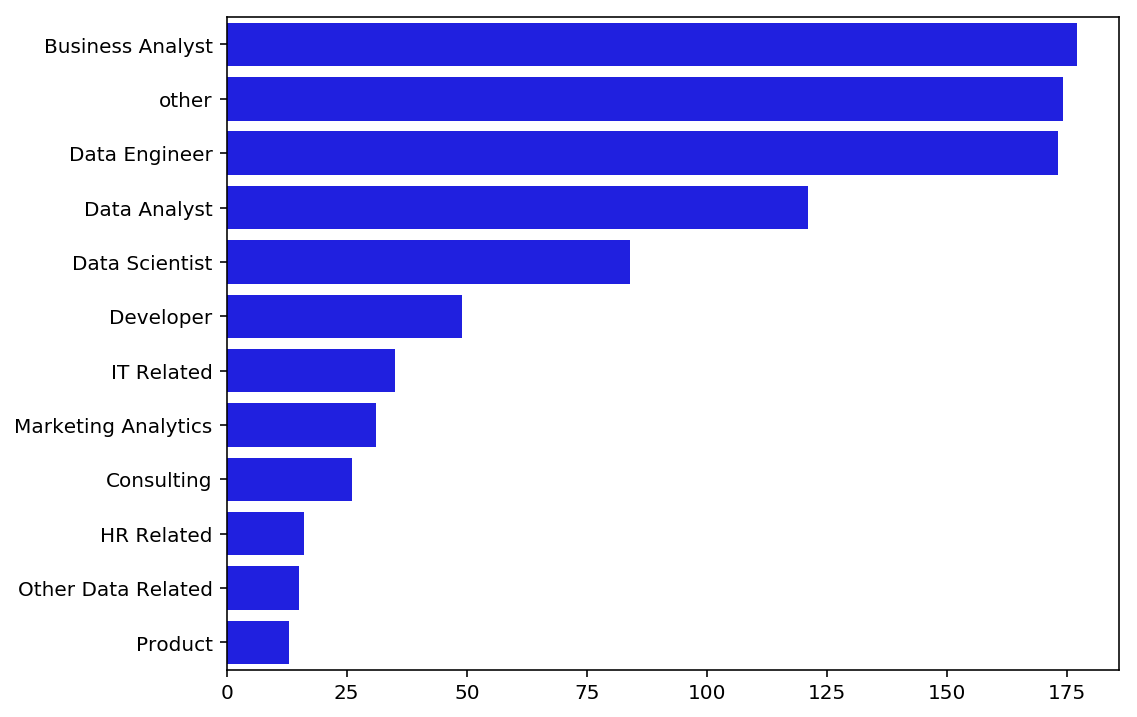

In [142]:
job_title_dist = df_clean['job_title_clean'].value_counts()

_ = plt.figure(figsize = (8,6))
_ = sns.barplot( job_title_dist.values, job_title_dist.index, color='blue')

In [89]:
#Look at distribution of industry where 'other' jobs come from
df_clean[df_clean.job_title_clean == 'other']['industry'].value_counts()

Information Technology                                                                                     26
Advertising / Media                                                                                        19
Banking and Finance                                                                                        14
Education and Training                                                                                     11
Accounting / Auditing / Taxation                                                                            8
F&B                                                                                                         7
Logistics / Supply Chain                                                                                    7
Others                                                                                                      6
Sciences / Laboratory / R&D                                                                                 6
Sales / Re

**3. Industry**

In [103]:
df_clean.industry.value_counts().head()

Information Technology         361
Banking and Finance            113
Sciences / Laboratory / R&D     60
Others                          28
Advertising / Media             26
Name: industry, dtype: int64

**4. Look at distribution seniority**

In [93]:
df_clean['seniority_clean'] = ['Professional' if 'professional' in seniority.lower() else 
                               'Senior Management' if 'senior' in seniority.lower() and 'manage' in seniority.lower() else
                                'Middle Management' if 'middle' in seniority.lower() and 'manage' in seniority.lower()else 
                                 'Senior Executive'if 'senior' in seniority.lower() and 'exec' in seniority.lower() else
                                 'Junior Executive'if 'junior' in seniority.lower() and 'exec' in seniority.lower() else
                                 'Executive'if 'exec' in seniority.lower() else
                                 'Entry Level'if 'fresh'in seniority.lower() or 'entry'in seniority.lower() else
                               'other' for seniority in df_clean['seniority']]

In [94]:
df_clean['seniority_clean'].value_counts()

Professional         335
Executive            188
other                111
Senior Executive     105
Middle Management     71
Senior Management     52
Junior Executive      38
Entry Level           14
Name: seniority_clean, dtype: int64

**5. Salary**

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


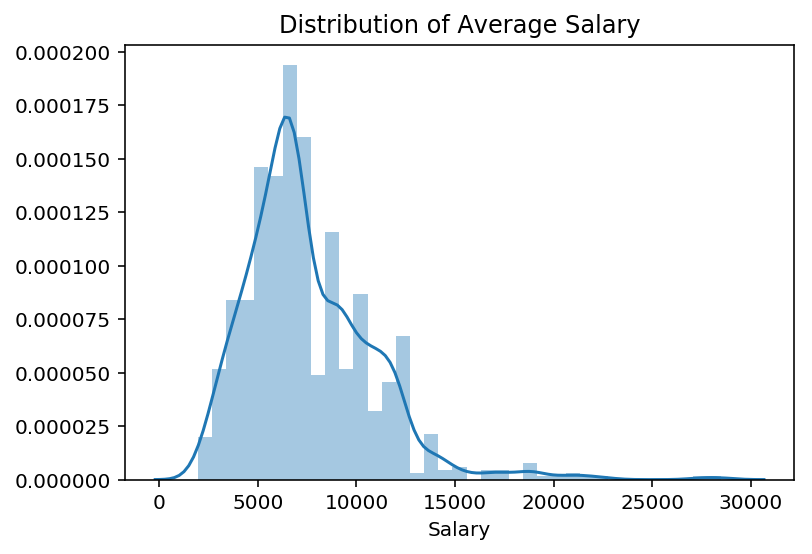

In [125]:
sns.distplot(df_clean['salary_avg'])
plt.title('Distribution of Average Salary')
plt.xlabel('Salary');

In [145]:
tresh_salary_high = np.percentile(df_clean.salary_avg, 75)
tresh_salary_med = np.percentile(df_clean.salary_avg, 50)
tresh_salary_low = np.percentile(df_clean.salary_avg, 25)

print('high salary treshold: ', tresh_salary_high)
print('low salary treshold: ', tresh_salary_low)

high salary treshold:  9075.0
low salary treshold:  5500.0


In [136]:
df_clean['salary_class'] = ['low' if salary_avg <= tresh_salary_low else 
                          'high' if salary_avg >= tresh_salary_high else
                          'mid' for salary_avg in df_clean.salary_avg]

In [127]:
df_clean.head()

,company_name,employment_type,industry,job_description,job_title,requirements,salary_max,salary_min,seniority,salary_avg,job_title_clean,seniority_clean,salary_cat,salary_class
1,Company Undisclosed,"Contract, Full Time",Information Technology,"Roles & Responsibilities Design, build, launch...",Data Engineer,Requirements Experience and passion for data e...,7000.0,5000.0,Executive,6000.0,Data Engineer,Executive,mid,mid
2,SCIENTE INTERNATIONAL PTE. LTD.,"Contract, Full Time",Banking and Finance,Roles & ResponsibilitiesWe are looking for a p...,Business Analyst - Analytics,RequirementsMandatory Skill-set Degree in Ban...,8000.0,5000.0,Professional,6500.0,Business Analyst,Professional,mid,mid
3,CHEIL SINGAPORE PTE. LTD.,"Permanent, Full Time",Engineering,Roles & Responsibilities Integrate all owned m...,Data Scientist,Requirements 4 to 6 years hands-on experience ...,9000.0,4000.0,Senior Executive,6500.0,Data Scientist,Senior Executive,mid,mid
4,Company Undisclosed,"Permanent, Full Time","Engineering, Manufacturing",Roles & ResponsibilitiesResponsibilities: 1)...,Facilities Data Scientist,"RequirementsRequirements: •Bachelor, Master o...",6000.0,3400.0,Junior Executive,4700.0,Data Scientist,Junior Executive,low,low
5,WATSON'S PERSONAL CARE STORES PTE LTD,"Permanent, Full Time",Others,Roles & ResponsibilitiesTo assist with promoti...,Business Analyst (Trading),Requirements Degree in Business Administration...,3500.0,2800.0,Executive,3150.0,Business Analyst,Executive,low,low


In [140]:
df_clean.salary_class.value_counts()

mid     432
low     253
high    229
Name: salary_class, dtype: int64

In [138]:
print('Baseline: {}'.format(1.0-(float(432)/float(432+253+229))))

Baseline: 0.5273522975929978


In [134]:
#Save to SQL
df_clean.to_sql('alljobs', con=conn, if_exists = 'replace')